In [1]:
# Source: https://dzone.com/articles/building-word-cloud-with-r 

In [2]:
# ##Install Packages
# install.packages("NLP")
# install.packages("tm")  # for text mining
# install.packages("SnowballC") # for text stemming
# install.packages("wordcloud") # word-cloud generator 
# install.packages("RColorBrewer") # color palettes
# install.packages("ggplot2")
# install.packages("lubridate")

In [54]:
library(NLP)
library(tm)
library(SnowballC)
library(RColorBrewer)
library(wordcloud)
library(ggplot2)
library(dplyr)
library(tidyverse)
library(lubridate)

#### First, we need to load the CSV data and then load the required library for building the word cloud.

In [55]:
setwd('/home/pierre/Dropbox/repos/word-cloud-example/')

In [56]:
df <- read.csv('data/chamados_remotos_atendidos_covid-19.csv')
df <- data.frame(df)
df$all <- paste(df$`Solução`, df$`Técnico`, df$`Usuário`, df$Origem, df$Problema)

In [57]:
head(df)

Data,Origem,Usuário,Técnico,Modalidade,Problema,Solução,all
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
23/03/2020,Slack,Renzo,Fernando,Acesso VPN,Aplicativo Fortclient bloqueando Hotspot residêncial.,Configurar policitar para liberação no fortclient o endereço do hotspot residêncial. (PLANEJADO 24-03),Configurar policitar para liberação no fortclient o endereço do hotspot residêncial. (PLANEJADO 24-03) Fernando Renzo Slack Aplicativo Fortclient bloqueando Hotspot residêncial.
18/03/2020,zap,Camila,vandson,sistema,instalação de stata no notebook Cidas,"Não foi possivel, faltra de licença","Não foi possivel, faltra de licença vandson Camila zap instalação de stata no notebook Cidas"
18/03/2020,pessoalmente,Priscila,vandson,vpn,configuração,"instalado mas não estabelicido, verificado por Pedro","instalado mas não estabelicido, verificado por Pedro vandson Priscila pessoalmente configuração"
19/03/2020,zap,Alayde,vandson,vpn,configuração VPN,ajuda remota,ajuda remota vandson Alayde zap configuração VPN
19/03/2020,zap,camila,vandson,suporte,configuração teclado,verificado e solucionado,verificado e solucionado vandson camila zap configuração teclado
19/03/2020,zap,camila,vandson,VPN,não conecta a VPN,acessado e verificado a instabilidade no Cidacs,acessado e verificado a instabilidade no Cidacs vandson camila zap não conecta a VPN


In [8]:
# stopwords = c("a", "em", "de", "até", "com", "após", "ante", "contra", "desde", "entre", "para", "por", "perante", "sem", "sob", "sobre", "trás",
#               "estava", "com", "dos", "porem", "trabalho", "ferreira", "lima", "às")

#### Now, we need to create the corpus of data.

In [14]:
## Calculate Corpus
df.Corpus <- Corpus(VectorSource(df$all))

#### We need to clean the data. This includes removing stopwords, numbers, whitespace, etc. and converting the corpus into a plain text document.

In [48]:
df.Clean <- tm_map(df.Corpus, PlainTextDocument)
df.Clean <- tm_map(df.Corpus, tolower)
df.Clean <- tm_map(df.Clean, removeNumbers)
df.Clean <- tm_map(df.Clean, removeWords,c(stopwords("portuguese"), 'nao', 'souza', 'via', 'feito', 'lima', 'nova', 'dia', 'zap', 'pessoalmente'))
df.Clean <- tm_map(df.Clean, removePunctuation)
df.Clean <- tm_map(df.Clean, stripWhitespace)
df.Clean <- tm_map(df.Clean, stemDocument)

Warning message in tm_map.SimpleCorpus(df.Corpus, PlainTextDocument):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(df.Corpus, tolower):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(df.Clean, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(df.Clean, removeWords, c(stopwords("portuguese"), :
“transformation drops documents”Warning message in tm_map.SimpleCorpus(df.Clean, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(df.Clean, stripWhitespace):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(df.Clean, stemDocument):
“transformation drops documents”

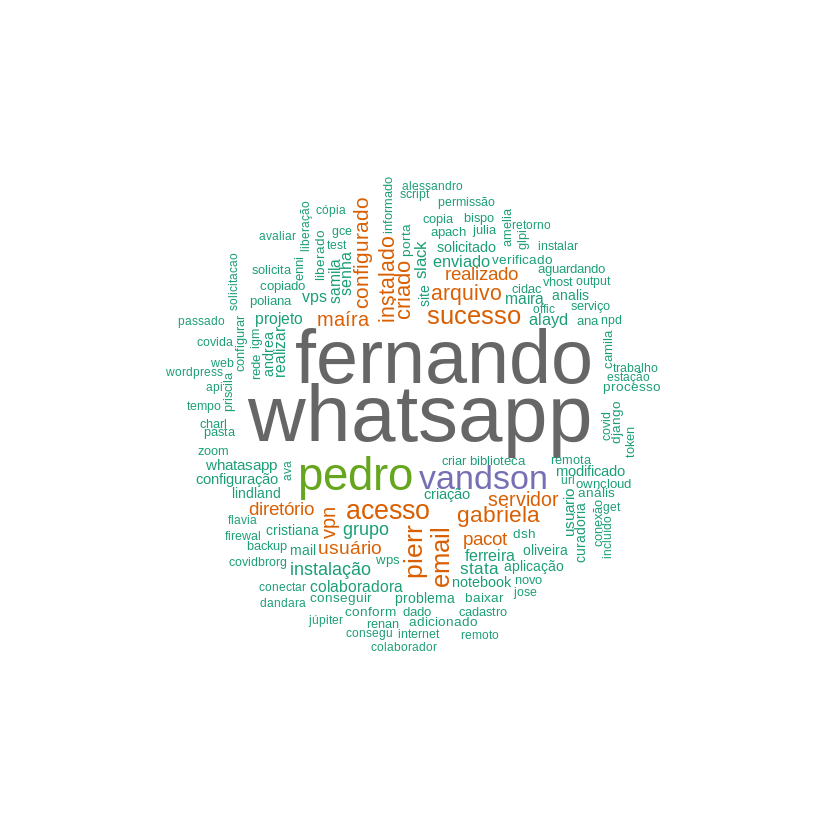

In [49]:
# wordcloud(df.Clean,max.words = 400,random.color = TRUE,random.order=FALSE)
wordcloud(words = df.Clean, min.freq = 5,
          max.words=200, random.order=FALSE, rot.per=0.25, 
          colors=brewer.pal(8, "Dark2"))

#### Here are a couple of important definitions.

scale: Indicates the range of sizes of the words.

max.words: Plots the specified number of words and discard least frequent terms.]

min.freq: Discards all terms whose frequency is below the specified value.

random.order: By setting this to false, we make it so that the words with the highest frequency are plotted first. If we don’t set this, it will plot the words in a random order and the highest frequency words may not necessarily appear in the center.

rot.per: Determines the fraction of words that are plotted vertically.

colors: The default value is black. If you want to use different colors based on frequency, you can specify a vector of colors or use one of the pre-defined color palettes.

In [74]:
df$Data <- as.Date(df$Data)
head(df)

Data,Origem,Usuário,Técnico,Modalidade,Problema,Solução,all
<date>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
23-03-02,Slack,Renzo,Fernando,Acesso VPN,Aplicativo Fortclient bloqueando Hotspot residêncial.,Configurar policitar para liberação no fortclient o endereço do hotspot residêncial. (PLANEJADO 24-03),Configurar policitar para liberação no fortclient o endereço do hotspot residêncial. (PLANEJADO 24-03) Fernando Renzo Slack Aplicativo Fortclient bloqueando Hotspot residêncial.
18-03-20,zap,Camila,vandson,sistema,instalação de stata no notebook Cidas,"Não foi possivel, faltra de licença","Não foi possivel, faltra de licença vandson Camila zap instalação de stata no notebook Cidas"
18-03-20,pessoalmente,Priscila,vandson,vpn,configuração,"instalado mas não estabelicido, verificado por Pedro","instalado mas não estabelicido, verificado por Pedro vandson Priscila pessoalmente configuração"
19-03-20,zap,Alayde,vandson,vpn,configuração VPN,ajuda remota,ajuda remota vandson Alayde zap configuração VPN
19-03-20,zap,camila,vandson,suporte,configuração teclado,verificado e solucionado,verificado e solucionado vandson camila zap configuração teclado
19-03-20,zap,camila,vandson,VPN,não conecta a VPN,acessado e verificado a instabilidade no Cidacs,acessado e verificado a instabilidade no Cidacs vandson camila zap não conecta a VPN


In [58]:
df_vol <- df %>% group_by(Data) %>% count() 
df_vol <- df_vol %>% mutate(dmy(Data))
df_vol <- na.omit(df_vol)
df_vol$n <- as.double(df_vol$n)

In [59]:
names(df_vol)[names(df_vol) == "dmy(Data)"] <- "data"

In [60]:
df_vol <- df_vol %>% ungroup() %>% select(data, n)

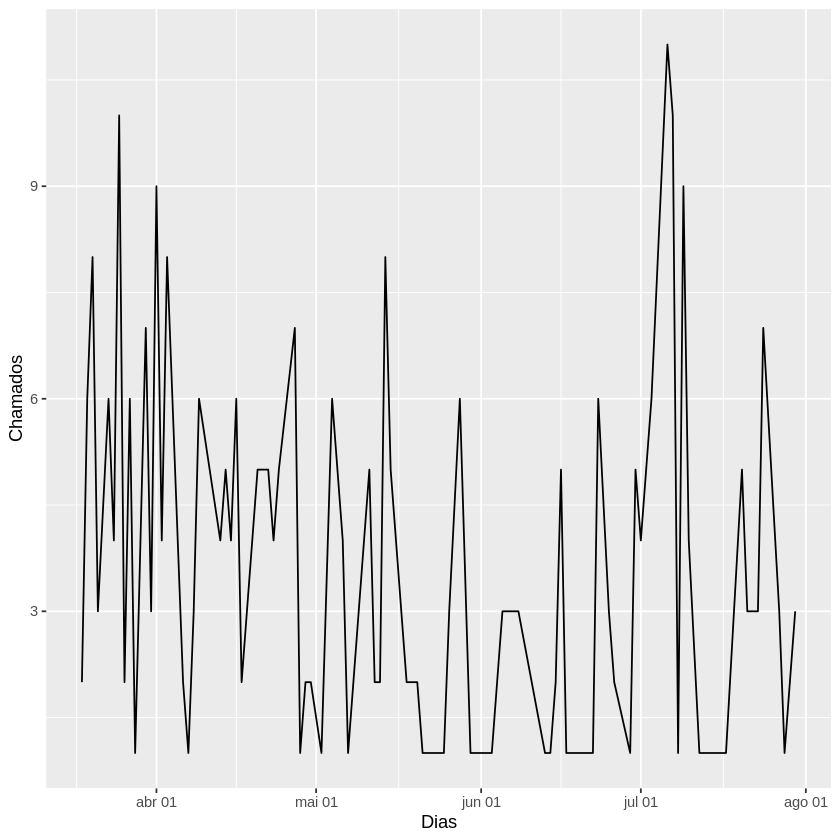

In [73]:
ggplot(df_vol, aes(x=data, y=n)) + geom_line() + scale_x_date(date_labels = "%b %d", date_breaks = "1 month", ) + ylab("Chamados") + xlab("Dias")